In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
import pickle

In [53]:
from sklearn.model_selection import cross_val_score, KFold

In [54]:
with open('../../bases/credit.pkl', 'rb') as f:
    X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [55]:
X_credit = np.concatenate((X_credit_treinamento, X_credit_teste), axis = 0)
Y_credit = np.concatenate((Y_credit_treinamento, Y_credit_teste), axis = 0)

RODANDO VALIDAÇÃO CRUZADA COM OS MELHORES PARAMETROS ENCONTRADOS PELO GREEDYSEARCH

In [56]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_regressao_logistica = []
resultados_svm = []
resultados_redes_neurais = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
    score = cross_val_score(arvore, X_credit, Y_credit, cv = kfold)
    resultados_arvore.append(score.mean())
    
    random_forest = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=10)
    score = cross_val_score(random_forest, X_credit, Y_credit, cv = kfold)
    resultados_random_forest.append(score.mean())

    knn = KNeighborsClassifier()
    score = cross_val_score(knn, X_credit, Y_credit, cv = kfold)
    resultados_knn.append(score.mean())

    logistica = LogisticRegression(C=1.0, solver='lbfgs', tol=0.0001)
    score = cross_val_score(logistica, X_credit, Y_credit, cv = kfold)
    resultados_regressao_logistica.append(score.mean())

    svm = SVC(kernel='rbf', C = 2)
    score = cross_val_score(svm, X_credit, Y_credit, cv = kfold)
    resultados_svm.append(score.mean())

    rede_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
    score = cross_val_score(rede_neural, X_credit, Y_credit, cv = kfold)
    resultados_redes_neurais.append(score.mean())

C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mathe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behav

In [57]:
resultados_arvore

[0.9864999999999998,
 0.9844999999999999,
 0.9905000000000002,
 0.9869999999999999,
 0.9884999999999999,
 0.9890000000000001,
 0.9880000000000001,
 0.9875,
 0.9865,
 0.9869999999999999,
 0.9865,
 0.9899999999999999,
 0.9889999999999999,
 0.9864999999999998,
 0.984,
 0.986,
 0.9855,
 0.9904999999999999,
 0.9875,
 0.9869999999999999,
 0.983,
 0.9870000000000001,
 0.9884999999999999,
 0.9875,
 0.9870000000000001,
 0.9880000000000001,
 0.9879999999999999,
 0.986,
 0.986,
 0.9884999999999999]

In [58]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'R. Forest': resultados_random_forest, 'KNN': resultados_knn, 'Logística': resultados_regressao_logistica, 'SVM': resultados_svm, 'RN': resultados_redes_neurais})

In [59]:
resultados

,Arvore,R. Forest,KNN,Logística,SVM,RN
0,0.9865,0.9820,0.9815,0.9475,0.9845,0.9975
1,0.9845,0.9835,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9830,0.9795,0.9470,0.9865,0.9970
3,0.9870,0.9820,0.9780,0.9460,0.9850,0.9970
4,0.9885,0.9815,0.9820,0.9465,0.9850,0.9975
5,0.9890,0.9875,0.9780,0.9465,0.9845,0.9970
6,0.9880,0.9795,0.9805,0.9470,0.9860,0.9960
7,0.9875,0.9820,0.9800,0.9480,0.9850,0.9975
8,0.9865,0.9855,0.9795,0.9465,0.9840,0.9970
9,0.9870,0.9815,0.9820,0.9465,0.9845,0.9970


In [60]:
resultados.describe()

,Arvore,R. Forest,KNN,Logística,SVM,RN
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.983200,0.980050,0.946950,0.985083,0.997083
std,0.001741,0.002032,0.001533,0.000687,0.001280,0.000475
min,0.983000,0.979500,0.977000,0.945500,0.982000,0.996000
25%,0.986500,0.982000,0.979000,0.946500,0.984125,0.997000
50%,0.987000,0.983000,0.980000,0.947000,0.985000,0.997000
75%,0.988375,0.984875,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987500,0.982500,0.948500,0.987500,0.998000


In [61]:
resultados.var()

Arvore       3.029885e-06
R. Forest    4.131034e-06
KNN          2.350862e-06
Logística    4.715517e-07
SVM          1.639368e-06
RN           2.255747e-07
dtype: float64

In [62]:
(resultados.std() / resultados.mean()) * 100

Arvore       0.176317
R. Forest    0.206722
KNN          0.156446
Logística    0.072517
SVM          0.129977
RN           0.047634
dtype: float64

Comparação entre os algoritmos

In [63]:
alpha = 0.05 #confiança do teste 95% padrão

In [64]:
from scipy.stats import shapiro

In [65]:
shapiro(resultados_arvore), shapiro(resultados_random_forest), shapiro(resultados_knn), shapiro(resultados_regressao_logistica), shapiro(resultados_arvore), shapiro(resultados_svm), shapiro(resultados_redes_neurais)

(ShapiroResult(statistic=0.9723324775695801, pvalue=0.6047698855400085),
 ShapiroResult(statistic=0.9644037485122681, pvalue=0.3992408215999603),
 ShapiroResult(statistic=0.9584025144577026, pvalue=0.28181397914886475),
 ShapiroResult(statistic=0.9370949268341064, pvalue=0.07598038017749786),
 ShapiroResult(statistic=0.9723324775695801, pvalue=0.6047698855400085),
 ShapiroResult(statistic=0.9622980356216431, pvalue=0.354146808385849),
 ShapiroResult(statistic=0.9094139933586121, pvalue=0.014382951892912388))

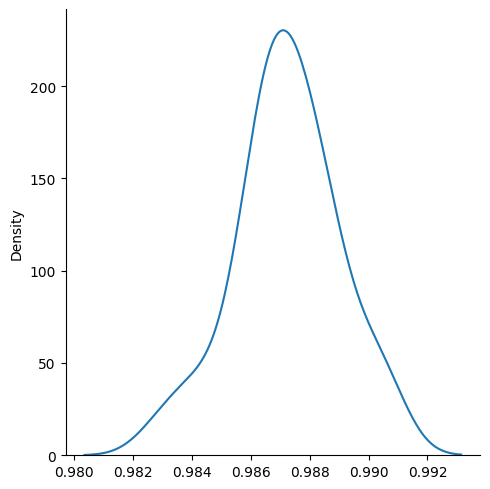

In [66]:
sns.displot(resultados_arvore, kind='kde')

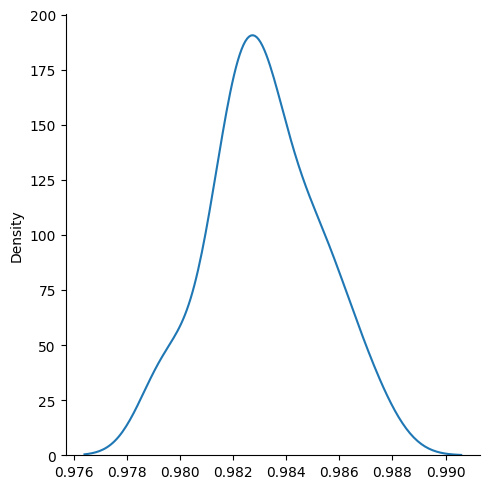

In [67]:
sns.displot(resultados_random_forest, kind='kde')

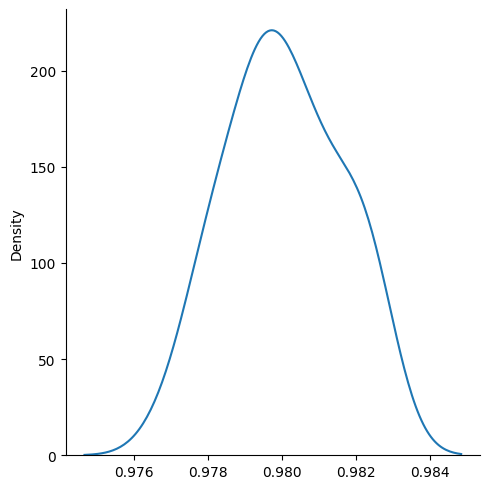

In [68]:
sns.displot(resultados_knn, kind='kde')

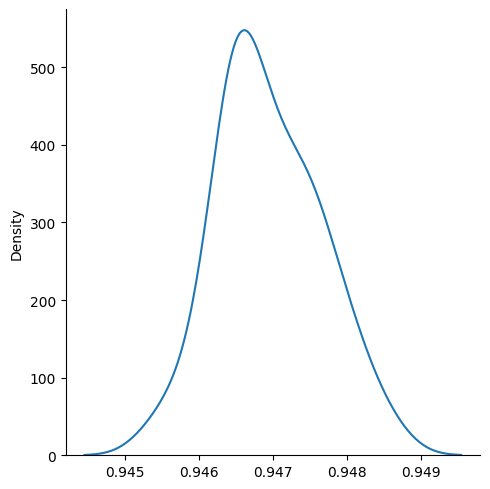

In [69]:
sns.displot(resultados_regressao_logistica, kind='kde')

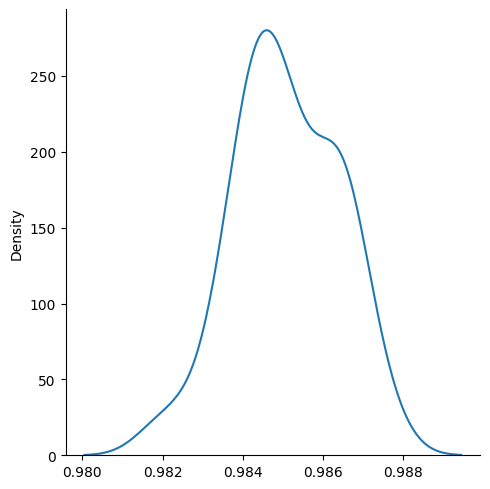

In [70]:
sns.displot(resultados_svm, kind='kde')

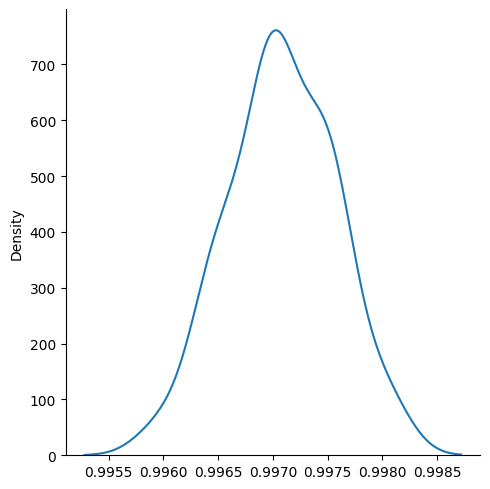

In [71]:
sns.displot(resultados_redes_neurais, kind='kde')

TESTES COM ANOVA E TUKEY

In [72]:
from scipy.stats import f_oneway

In [73]:
_, p = f_oneway(resultados_arvore, resultados_random_forest, resultados_knn, resultados_regressao_logistica, resultados_svm,resultados_redes_neurais)

In [74]:
p

1.006808013620757e-181

In [75]:
alpha = 0.05

In [76]:
if p <= alpha:
    print('Hiótese nula rejeitada. Dados são diferentes')
else:
    print('Hipótese alternativa rejeitada. Resultados são iguais')

Hiótese nula rejeitada. Dados são diferentes


In [77]:
resultados_algoritmos = {'accuracy': np.concatenate([resultados_arvore, resultados_random_forest, resultados_knn,resultados_regressao_logistica, resultados_svm, resultados_redes_neurais]), 
    'algoritmo': ['arvore', 'arvore', 'arvore', 'arvore', 'arvore','arvore', 'arvore', 'arvore', 'arvore', 'arvore','arvore', 'arvore', 'arvore', 'arvore', 'arvore','arvore', 'arvore', 'arvore', 'arvore', 'arvore','arvore', 'arvore', 'arvore', 'arvore', 'arvore','arvore', 'arvore', 'arvore', 'arvore', 'arvore',
                'rforest', 'rforest', 'rforest', 'rforest', 'rforest','rforest', 'rforest', 'rforest', 'rforest', 'rforest','rforest', 'rforest', 'rforest', 'rforest', 'rforest','rforest', 'rforest', 'rforest', 'rforest', 'rforest','rforest', 'rforest', 'rforest', 'rforest', 'rforest','rforest', 'rforest', 'rforest', 'rforest', 'rforest',
                'knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn','knn', 'knn', 'knn', 'knn', 'knn',
                 'rl', 'rl', 'rl', 'rl', 'rl','rl', 'rl', 'rl', 'rl', 'rl','rl', 'rl', 'rl', 'rl', 'rl','rl', 'rl', 'rl', 'rl', 'rl','rl', 'rl', 'rl', 'rl', 'rl','rl', 'rl', 'rl', 'rl', 'rl',
                'svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm', 'svm','svm', 'svm', 'svm', 'svm', 'svm',
                'RN', 'RN', 'RN', 'RN', 'RN','RN', 'RN', 'RN', 'RN', 'RN','RN', 'RN', 'RN', 'RN', 'RN','RN', 'RN', 'RN', 'RN', 'RN','RN', 'RN', 'RN', 'RN', 'RN','RN', 'RN', 'RN', 'RN', 'RN',
                 ]
    }

In [78]:
resultados_df = pd.DataFrame(resultados_algoritmos)

In [79]:
resultados_df.head(60)

,accuracy,algoritmo
0,0.9865,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9885,arvore
5,0.9890,arvore
6,0.9880,arvore
7,0.9875,arvore
8,0.9865,arvore
9,0.9870,arvore


In [80]:
resultados_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9870,arvore
4,0.9885,arvore
...,...,...
175,0.9975,RN
176,0.9975,RN
177,0.9965,RN
178,0.9975,RN


In [81]:
from statsmodels.stats.multicomp import MultiComparison

In [82]:
compara_algoritmos = MultiComparison(resultados_df['accuracy'], resultados_df['algoritmo'])

In [83]:
teste_estatistico = compara_algoritmos.tukeyhsd()

In [84]:
print(teste_estatistico)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
     RN  arvore  -0.0098   0.0 -0.0109 -0.0088   True
     RN     knn   -0.017   0.0 -0.0181  -0.016   True
     RN rforest  -0.0139   0.0 -0.0149 -0.0128   True
     RN      rl  -0.0501   0.0 -0.0512 -0.0491   True
     RN     svm   -0.012   0.0  -0.013  -0.011   True
 arvore     knn  -0.0072   0.0 -0.0082 -0.0061   True
 arvore rforest   -0.004   0.0 -0.0051  -0.003   True
 arvore      rl  -0.0403   0.0 -0.0413 -0.0392   True
 arvore     svm  -0.0022   0.0 -0.0032 -0.0011   True
    knn rforest   0.0031   0.0  0.0021  0.0042   True
    knn      rl  -0.0331   0.0 -0.0341 -0.0321   True
    knn     svm    0.005   0.0   0.004  0.0061   True
rforest      rl  -0.0362   0.0 -0.0373 -0.0352   True
rforest     svm   0.0019   0.0  0.0008  0.0029   True
     rl     svm   0.0381   0.0  0.0371  0.0392   True
----------------------------

In [85]:
resultados.mean()

Arvore       0.987233
R. Forest    0.983200
KNN          0.980050
Logística    0.946950
SVM          0.985083
RN           0.997083
dtype: float64

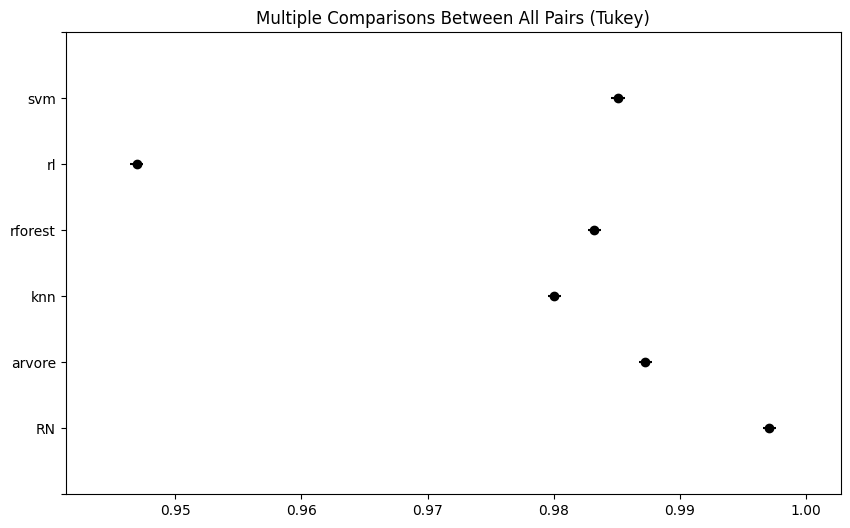

In [86]:
teste_estatistico.plot_simultaneous();